# [IAPR 2019:][iapr2019] Lab 2 ‒  Object description

**Author:** first name and last name  
**Due date:** 19.04.2019

[iapr2019]: https://github.com/LTS5/iapr-2019

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Description
In the `lab-02-data/` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

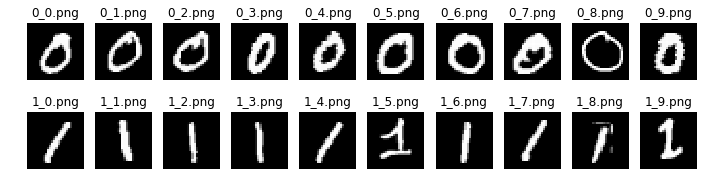

In [2]:
import os
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors

Let ($x_{k}$,$y_{k}$), _k=0…N-1_, be the coordinates of the
N successive points of a contour. For each of
those points, we define them as complex
numbers: $u_{k}$ = $x_{k}$ + j$y_{k}$.

We will write the x and y coordinates as two vectors, and use each coordinate pairs as a complex number, x-axis treated as real axis and y as imaginary axis. Fourier transforming the new coordinates generates the fourier descriptors.

Inverse transforming of all these descriptors regenerates the  original coordinates. If only some of the descriptors are used in the inverse transform, an approximation of the original object is the result.


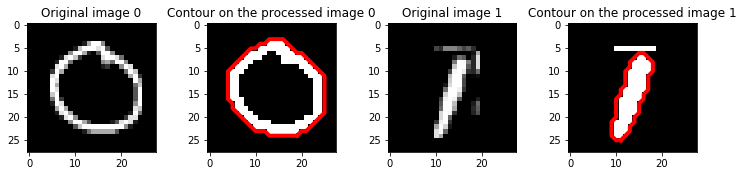

In [3]:
# Contour detection 
import cv2
from skimage import measure, transform, morphology
import numpy as np
from scipy import ndimage
from skimage import morphology

# process the boundary on the given image
image0 = np.copy(zeros_im[-2])
image1 = np.copy(ones_im[-2])

# Define a function to perform mathematical morphology & binarization operations
kernel2 = np.ones((2,2),np.uint8)
def pre_processing(image):
    image = ndimage.grey_opening(image,size = (1,2))
    _, thresh = cv2.threshold(image,40,255,cv2.THRESH_BINARY)
    removed_small_objects = morphology.remove_small_objects(thresh.astype(bool), min_size=40)
    dilated_thresh = cv2.morphologyEx(removed_small_objects.astype(np.uint8), cv2.MORPH_DILATE,kernel2, iterations = 0)
    contour = measure.find_contours(dilated_thresh, 0)[0]
    return thresh,contour

#Plots the histogram of these two images below them
titles = ['Original image 0', 'Contour on the processed image 0', 'Original image 1', 'Contour on the processed image 1']
outputs = [zeros_im[-2], pre_processing(image0)[0], ones_im[-2], pre_processing(image1)[0]]

fig = plt.figure(figsize=(12,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1,5):
    ax = fig.add_subplot(1, 4, i)
    if (i == 1) or (i == 3) :
        ax.imshow(outputs[i-1], cmap='gray')
    else: 
        if (i == 2):
            ax.plot(pre_processing(image0)[1][:, 1], pre_processing(image0)[1][:, 0], color ='red', linewidth=4)
            ax.imshow(outputs[i-1], cmap='gray')
        elif (i == 4):                
            ax.plot(pre_processing(image1)[1][:, 1], pre_processing(image1)[1][:, 0], color ='red', linewidth=4)
            ax.imshow(outputs[i-1], cmap='gray')
    plt.title(titles[i-1])
plt.show()


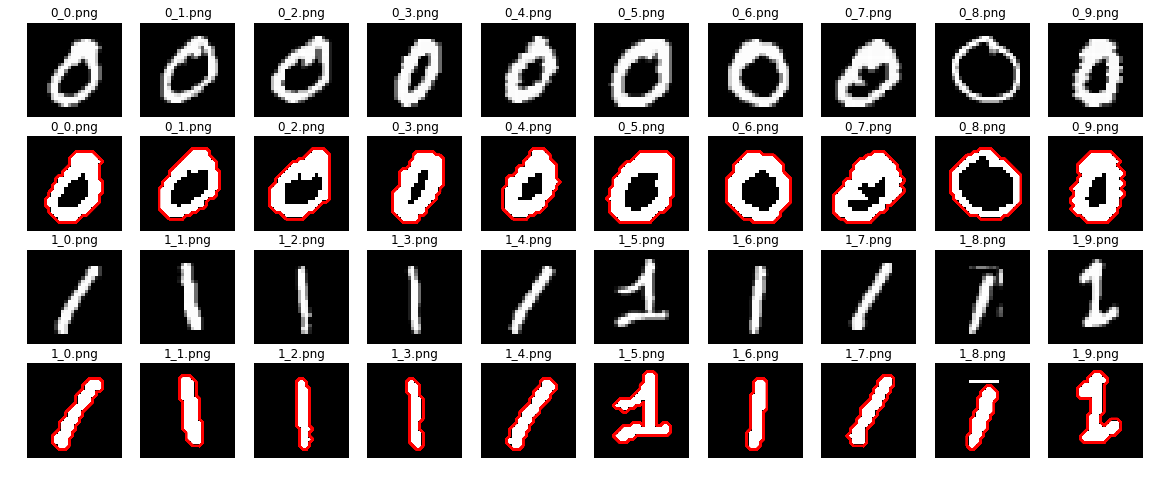

In [4]:
# Plot images to compare the preprocessing effects and show contour on the preprocessed images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
# zeros images before applying preprocessing
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
# zeros images after aplying preprocessing
for ax, im, nm in zip(axes[1], zeros_im, zeros_names):
    im = pre_processing(im)[0]
    ax.imshow(im, cmap='gray')
    [ax.plot(pre_processing(im)[1][:, 1], pre_processing(im)[1][:, 0], color ='red', linewidth=2) for i in im]
    ax.axis('off')
    ax.set_title(nm)
# ones images before applying preprocessing   
for ax, im, nm in zip(axes[2], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
# ones images after aplying preprocessing
for ax, im, nm in zip(axes[3], ones_im, ones_names):
    im = pre_processing(im)[0]
    ax.imshow(im, cmap='gray')
    [ax.plot(pre_processing(im)[1][:, 1], pre_processing(im)[1][:, 0], color ='red', linewidth=2) for i in im]
    ax.axis('off')
    ax.set_title(nm)

In [5]:
def fourierDescriptors(image, index):
    '''
    The first descriptors contain the majority
    of the shape information of the object
    '''
    # index: the index of fourier components
    contour = measure.find_contours(image, 0)[0]
    u_k = contour[:,1] + 1j*contour[:,0]   
    u_kFFT = np.fft.fft(u_k)
    # Since the first descriptors contain the majority of the shape information of the object we choose the first descriptors as the reference
    descr = abs(u_kFFT[1])
    # Return a list of normalized features
    return [abs(u_kFFT[i])/descr for i in index]

__Performing rotation on the image:__

In [6]:
def rotation(image):
    # Rotation to get more images
    '''
    A rotation affect the phase of all the descriptors by the same amount, and does not modify their amplitude
    '''
    #rotate45d = [transform.rotate(i, 45, resize=False, preserve_range=True).astype('uint8') for i in image]
    rotate90d = [transform.rotate(i, 90, resize=False, preserve_range=True).astype('uint8') for i in image]
    #rotate135d = [transform.rotate(i, 135, resize=False, preserve_range=True).astype('uint8') for i in image]
    rotate180d = [transform.rotate(i, 180, resize=False, preserve_range=True).astype('uint8') for i in image]
    #rotate225d = [transform.rotate(i, 225, resize=False, preserve_range=True).astype('uint8') for i in image]
    rotate270d = [transform.rotate(i, 270, resize=False, preserve_range=True).astype('uint8') for i in image]
    return  list(image) + rotate90d + rotate180d + rotate270d

__Fourier Transform:__

In [7]:
def fourierTransform(image, index):
    image_transformed = rotation(image)
    image_fourier = []
    for i in image_transformed:
        i = pre_processing(i)[0]
        a = fourierDescriptors(i, index)
        image_fourier.append(a)
    image_fourier = np.array(image_fourier)
    return image_fourier

zerosFourier = fourierTransform(zeros_im, [2,3])
onesFourier = fourierTransform(ones_im, [2,3])

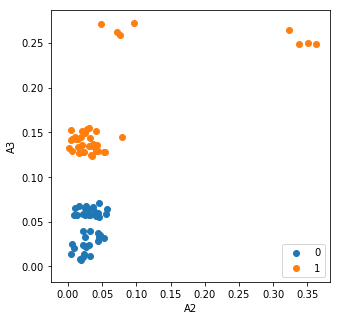

In [8]:
# Plotting the results
plt.figure(figsize=(5,5))
plt.scatter(zerosFourier[:,0], zerosFourier[:,1], label='0')
plt.scatter(onesFourier[:,0], onesFourier[:,1], label='1')
plt.xlabel('A2')
plt.ylabel('A3')
plt.legend(loc='lower right');

After trying several different pairs of descriptors, A2 and A3 give us the two distinct clusters. We see that there are two clusters, 0s and 1s from the graph above which is external representation of the decsriptors. Moreover, these two clusters have small intra-class variance and large inter-class variance by using only two features of fourier descriptors. We also see the independence in translation-rotation while we trying rotation in different degrees.

However, from the above graph, we can also see that there are also outliers which have larger values in A3 descriptor for the cluster 1. It is clear from the raw images that they might be the 1s which are written differently than the other 1s. As we can see from the 1_5.png and 1_9.png, they have much more contours and corners than others do.

__Performing scaling on the image:__

In [9]:
def scaling(img):
    scaled_im = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_AREA  )
    return scaled_im

In [10]:
def fourierTransform(image, index):
    image_transformed = scaling(image)
    image_fourier = []
    for i in image_transformed:
        i = pre_processing(i)[0]
        a = fourierDescriptors(i, index)
        image_fourier.append(a)
    image_fourier = np.array(image_fourier)
    return image_fourier

zerosFourierS = fourierTransform(zeros_im, [2,3])
onesFourierS = fourierTransform(ones_im, [2,3])

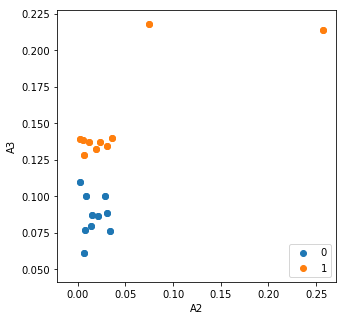

In [11]:
# Plotting the results
plt.figure(figsize=(5,5))
plt.scatter(zerosFourierS[:,0], zerosFourierS[:,1], label='0')
plt.scatter(onesFourierS[:,0], onesFourierS[:,1], label='1')
plt.xlabel('A2')
plt.ylabel('A3')
plt.legend(loc='lower right');

Scaling is just resizing of the image. OpenCV comes with a function cv2.resize() for this purpose. Different interpolation methods are used. Preferable interpolation methods are cv2.INTER_AREA for shrinking and cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR for zooming. After trying different interpolation methods and descriptors, we were able to do clustering of 0s and 1s by interpolating on cv2.INTER_AREA and by using A2 and A3 fourier descriptors. We see that there are two clusters, 0s and 1s from the graph above which is external representation of the decsriptors. Moreover, these two clusters have small intra-class variance and large inter-class variance by using only two features of fourier descriptors. 

However, in addition to rotation graph we did before, with the above graph, we can also see that there are also outliers which have larger values in A3 descriptor for the cluster 1. It is clear from the raw images that they might be the 1s which are written differently than the other 1s. As we can see from the 1_5.png and 1_9.png, they have much more contours and corners than others do.

### 1.3 Additional methods

>### 1.3.1 Region-based descriptors: simple ones

In this Region-based descriptors method, we will use compacity as a second feature while number of corners, rectangularity and elongation as a first features in feature extraction processes. 

Functions below, _featureImages()_ and _plottingFeature()_ will be used for the feature extraction processes and plotting the results in this method.

In [12]:
# Preparation for plotting features
def featureImages(im, f1, f2):
    imageRotated = rotation(im)
    features = []
    for i in imageRotated:
        a1 = f1(i)
        a2 = f2(i)
        features.append([a1, a2])
    features = np.array(features)
    return features, [f1.__name__, f2.__name__]

def plottingFeature(imFeatures, features, labels):
    plt.figure(figsize=(8,8))
    for f, l in zip(imFeatures, labels):
        plt.scatter(f[:,0], f[:,1], label=l)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(loc='center right')

>> __1.3.1.1 Compacity and Corner counting__

>>We know that each digits from 0 to 9 have different shapes and thus different number of coners for each of one. In order to be able to cluster the 0s and 1s, we can count the number of corners and use it as a feture. In this method, we also use another feature compacity (which is invariant in translation, rotation and scaling) of the image as the second feature.

In [13]:
# Defining compacity
def compacity(image):
    _,thresh1 = cv2.threshold(image,40,255,cv2.THRESH_BINARY)
    _, contours, _ = cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    A = cv2.contourArea(contours[0])
    P = cv2.arcLength(contours[0],True)
    C = (P**2)/A
    return C

In [14]:
def corner_counting(image):
    image = ndimage.grey_opening(image,size = (2,2))
    _,thresh1 = cv2.threshold(image,40,255,cv2.THRESH_BINARY)
    # harris_dst (--> output of Harris edge detector) – Image to store the Harris detector responses.
    harris_dst = cv2.cornerHarris(thresh1,2,3,0.04)
    # Threshold for an optimal value, it may vary depending on the image.
    numbers = thresh1[harris_dst>0.01*harris_dst.max()].shape 
    return numbers[0]

>>We saw that by increasing the threshold for an optimal value, the number of corners counted decreases. And in some point, it gets more difficult to do clustering of 0s and 1s digits' images.  

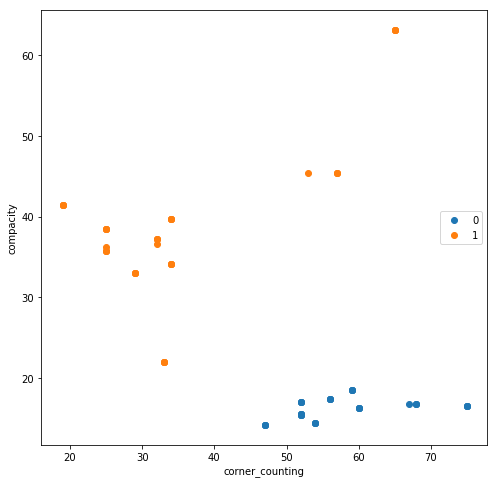

In [15]:
listImages = [zeros_im, ones_im]
listImagesResult = []
for im in listImages:
    imF, fName = featureImages(im, corner_counting, compacity)
    listImagesResult.append(imF)

plottingFeature(listImagesResult, fName, range(len(listImages)))

>> __1.3.1.2 Compacity and Rectangularity__

>> __1.3.1.3 Compacity and Elongation__

>### 1.3.2 Skeletons

>### 1.3.3 Moments

>### 1.3.4 HoG

In this part, we calculate the HoG descriptors of the each number images. We will firstly de-skew the image so that it is invariant to the rotation and then apply HoG to the image. Since there are many features extracted, we apply PCA (Principal Component Analysis) on the extracted features to be able to project data to a lower demensional space (in order to avoid curse of dimentionality).